# A need for multi-dimensional arrays
 Why do we need them?

For example, let's say I have a whole bunch of data points, like

    Person    The Matrix      Inception      Force Awakens     Wall-E ...
         A         5              4                5              ?
         B         4              ?                4              ?
         C         ?              ?                5              5
         ...
         
We would like to guess how Person C would rate Inception. Not an easy problem, but how would we store this kind of data in the first place?

If we wanted to just store the matrix, we can do a list of lists.

    xs = [[5, 4, 5, 3], [4, -1, 4, -1], [-1, -1, 5, 5]]
  
There are 3 lists (one per person) and each one has 4 entries. So it's a 3x4 matrix. We can do a lot with lists of lists, but it will be slow. We would eventually need a more efficient and flexible way of using multi-dimensional arrays:

The standard way of working with data sets in Python is to use the **Numpy** library. 

# Numpy Arrays

A Numpy array is a multi-dimensional array. 

In [1]:
import numpy as np
arr = np.array([[5, 4, 5, 3], [4, -1, 4, -1], [-1, -1, 5, 5]])
print arr

[[ 5  4  5  3]
 [ 4 -1  4 -1]
 [-1 -1  5  5]]


A Numpy array has a type: 

In [2]:
type(arr)

numpy.ndarray

Every array has a shape:

In [3]:
arr.shape

(3, 4)

Accessing elements:


In [4]:
print arr[0]    # 0th row

[5 4 5 3]


In [5]:
print arr[1]     # 1st row

[ 4 -1  4 -1]


In [6]:
print arr[0, 0]    # very different from lists of lists, for those, we would have done arr[0][0]

5


In [7]:
print arr[0, 1]

4


We can use slicing too:

In [8]:
print arr

[[ 5  4  5  3]
 [ 4 -1  4 -1]
 [-1 -1  5  5]]


In [9]:
print arr[1:3,1:3]

[[-1  4]
 [-1  5]]


In [10]:
print arr[0,:]

[5 4 5 3]


In [11]:
print arr[:,0]

[ 5  4 -1]


We can have 3- or higher-dimensional arrays too:

In [12]:
ar3 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print ar3

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [13]:
ar3.shape

(2, 2, 3)

In [14]:
ar3[0,1,2]

6

### Building special arrays

Zero matrix: 

In [15]:
print np.zeros((3,3))   # put the shape in as a tuple (or list)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


The identity matrix:

In [16]:
print np.identity(4) # square matrix

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [17]:
print np.eye(3, 4) # rectangular matrix

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]


Equally distant points:

In [18]:
print np.linspace(0,1,11)   # 11 points between 0 and and 1 inclusive

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Of course we could have done this with list comprehensions ... 

In [19]:
[1 + 0.1*n for n in range(11)]

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9, 2.0]

... but anything you do in numpy will be faster. 

### Reshape

In [20]:
arr = np.array(range(16))
print arr

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [21]:
print arr.reshape(4,4)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [22]:
print arr.reshape(2,2,-1)    # if you put -1, it figures out what the shape should be

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


Now that we know the third dimension should be 4, we can specify it as the third argument of `reshape`: 

In [23]:
print arr.reshape(2,2,4) 

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


### Vectorization/Broadcasting

Let's build an array using nested lists:

In [24]:
arr = [[0,0],[0,0]]
arr

[[0, 0], [0, 0]]

Suppose you wanted to add `1` to each element of the array. It would be easy to write the following, but you'll get an error:

In [25]:
arr + 1

TypeError: can only concatenate list (not "int") to list

Insted you'll have to work harder: 

In [26]:
ll = []
for i in arr: 
    l = []
    for j in i: 
        l += [j + 1]
    ll += [l]
ll

[[1, 1], [1, 1]]

Numpy allows you to do this relatively simple operation in a heartbeat:

In [27]:
arr = np.zeros([2,2])
print arr

[[ 0.  0.]
 [ 0.  0.]]


In [28]:
arr = arr + 1
print arr 

[[ 1.  1.]
 [ 1.  1.]]


In essence, the smaller array, `1`, is [**broadcast**](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) across the larger array, `arr`. We can think of the scalar `1` being stretched during the arithmetic operation into an array with the same shape as `arr`. 

Similarly:

In [29]:
def f(x):
    return 1 + x

print f(arr)    # again this would never work for lists

[[ 2.  2.]
 [ 2.  2.]]


In [30]:
def g(x):
    return x < 1

print g(arr)    # again this would never work for lists

[[False False]
 [False False]]


Even more interesting:

In [39]:
print np.array([1,2,3]) + np.array([4,5,6])   
# if these were lists, it would be concatenation

[5 7 9]


It added the arrays as if they were vectors. Numpy figures out how to apply the operation or function on the arrays you gave it. 

But maybe you want to have more control over how a function is applied to an array, say. Numpy provides some options that allow you to apply a function only to parts of an array, e.g. only the rows or the columns. Here's an example: 

In [32]:
arr = np.array(range(9)).reshape(3,3) + 1
print arr

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
np.sum(arr) == sum(range(1,10))

True

In [34]:
print np.apply_along_axis(np.sum, 0, arr)

[12 15 18]


In [35]:
print np.apply_along_axis(np.sum, 1, arr)

[ 6 15 24]


# Plotting with Matplotlib

Now that we have introduced Numpy, we can talk about plotting. 

For those familiar with Matlab, plotting in Python is very similar to Matlab's plotting functions. 

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi

In [37]:
xs = np.linspace(0, 2*pi, 200)
ys = np.cos(xs)
zs = np.sin(xs)

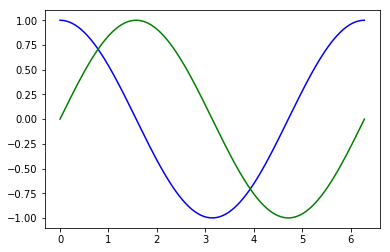

In [38]:
plt.plot(xs, ys, 'blue')  
plt.plot(xs, zs, 'green') 